In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov  7 13:03:32 2017

@author: sergio
"""

import numpy as np
#import random
import codecs
import math
import pandas
from scipy.spatial import Voronoi#, voronoi_plot_2d
from scipy.stats import wilcoxon, ranksums
from data import DATA
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [3]:
ORIGIN = "../static/ctc/CTC_HSIC_PVALUE_01.csv"
PVALUE_TRESH = 0.05
APARITION_TRESH = 0.0001

source_data=pandas.read_csv(ORIGIN, sep="\t", index_col=0, decimal=b',')
TOTAL_WORDS = pandas.DataFrame(source_data.loc["#TOTAL_WORDS#"]).drop(labels=['HSIC','PVALUE'])
WORDS = source_data.drop(labels=['#TOTAL_WORDS#','#TWEETS#',"#VOCABULARY_SIZE#","#USERS#"])
VALID_WORDS = WORDS.loc[(WORDS['PVALUE'] < PVALUE_TRESH)].drop(labels=['HSIC','PVALUE'], axis=1)


In [4]:
source_data

,HSIC,PVALUE,Abrego,Acevedo,Aguachica,Aguadas,Agustín Codazi,Aipe,Albania,Algeciras,...,Villanueva_Guajira,Villavicencio,Villeta,Vistahermosa,Yacopí,Yarumal,Yolombó,Yopal,Zarzal,Zipaquirá
#CITY#,,,,,,,,,,,,,,,,,,,,,
#TOTAL_WORDS#,NaN,NaN,36437,377893,420183,20995,98216,21343,170333,15201,...,376732,4208021,323566,6678,14270,48410,21982,905813,534321,2844050
#TWEETS#,NaN,NaN,3798,36674,41741,2161,9563,2231,15201,1541,...,36464,375201,31872,599,1447,5093,2212,79805,50522,307080
#VOCABULARY_SIZE#,NaN,NaN,6190,30211,30045,5015,12839,4566,19315,3882,...,28284,130388,28762,2239,3473,8582,5047,54391,33212,77838
#USERS#,NaN,NaN,505,2867,2936,584,1085,920,1896,556,...,1863,27088,6729,204,260,807,743,6774,2793,15825
de,0.001593,0.221557,1551,13385,13778,1076,3267,1193,6203,610,...,12766,162391,12420,274,507,1891,970,36058,17691,99276
que,0.001944,0.135729,1229,13613,17196,450,3436,554,5143,367,...,12292,126192,10272,180,530,1617,526,27452,21604,111317
la,0.001640,0.227545,852,8757,9400,610,2264,994,4947,395,...,10387,108191,9844,185,408,1240,568,22708,12650,61367
y,0.001738,0.181637,757,8654,9993,422,2188,402,3746,329,...,8700,95073,6963,153,330,1045,466,20842,12317,64793
el,0.001650,0.227545,665,7613,7932,501,2002,451,3724,414,...,8460,90612,6949,142,258,1010,434,18902,10745,51747


In [500]:
#gets Voronoi regions
points = np.array([[d[0],d[1]] for d in DATA])
vor = Voronoi(points)
TOTAL_WORDS_TRESH = TOTAL_WORDS["#TOTAL_WORDS#"]*APARITION_TRESH
VALID_WORDS_TRESH = (VALID_WORDS>TOTAL_WORDS_TRESH).astype(int)
VALID_WORDS_ABS_FREC =  VALID_WORDS/TOTAL_WORDS.values[:,0]


In [658]:
pueblo2 = 'Ipiales'
pueblo1 = 'Pasto'

def simple_rank(A,por):
    rank = {}
    A=A.sort_values(by=por, ascending=False)
    i=0
    anterior = False
    for index, row in A.iterrows():
        if row.values != anterior:
            i+=1
        anterior = row.values
        rank[index]= i
    rank = pandas.DataFrame.from_dict(rank, orient='index')
    rank = rank
    rank.columns = [por]
    return rank.sort_values(by=por)


def minlength_frame(pueblo1,pueblo2):
    A=pandas.DataFrame(VALID_WORDS[pueblo1])
    A = A[A[pueblo1] != 0]

    B=pandas.DataFrame(VALID_WORDS[pueblo2])
    B = B[B[pueblo2] != 0]

    if len(A)<len(B):
        return (len(A), A.columns.values[0],A)
    elif len(A)>len(B):
        return (len(B), B.columns.values[0],B)
    else:
        print('Tengo un mal presentimiento')
         

def join_valid_words_minlength(pueblo1,pueblo2):
    lenx, pueblo, frame = minlength_frame(pueblo1,pueblo2)
    ind = frame.index.values
    if pueblo == pueblo1:
        B=pandas.DataFrame(VALID_WORDS[pueblo2]).filter(items=ind, axis=0)
        B=simple_rank(B,pueblo2)
        frame=simple_rank(frame,pueblo1)
        return(frame.join(B))
    if pueblo == pueblo2:
        A=pandas.DataFrame(VALID_WORDS[pueblo1]).filter(items=ind, axis=0)
        A=simple_rank(A,pueblo1)
        frame=simple_rank(frame,pueblo2)
        return(A.join(frame))
    
def wilcoxon_by_orders(pueblo1, pueblo2):
    union = join_valid_words_minlength(pueblo1,pueblo2)
    union.to_csv('./prv.csv', sep="\t", decimal=",")
    n = len(union)
    s=n*(n+1)/2
    diferencia = union[pueblo1]-union[pueblo2]
    peso = diferencia.sum()/s
    wil, pvalue = wilcoxon(diferencia.values)
    return(n, peso, diferencia.sum(), wil, pvalue)

def minlength_heigths(pueblo1,pueblo2):
    lenx, pueblo, frame = minlength_frame(pueblo1,pueblo2)
    ind = frame.index.values
    if pueblo == pueblo1:
        B=pandas.DataFrame(VALID_WORDS[pueblo2]).filter(items=ind, axis=0)
        B=simple_rank(B,pueblo2)
        A=simple_rank(frame,pueblo1)
    if pueblo == pueblo2:
        A=pandas.DataFrame(VALID_WORDS[pueblo1]).filter(items=ind, axis=0)
        A=simple_rank(A,pueblo1)
        B=simple_rank(frame,pueblo2)
    total_a_words=A.loc[:,pueblo1].sum()
    total_b_words=B.loc[:,pueblo2].sum()
    A.loc[:,pueblo1] = A.loc[:,pueblo1]
    B.loc[:,pueblo2] = B.loc[:,pueblo2]
    n, peso, diferencia, wil, pvalue=wilcoxon_by_orders(pueblo1, pueblo2)
    C = abs(A.loc[:,pueblo1]-B.loc[:,pueblo2])
    absolute_difference=C.sum()
    return(absolute_difference, n, peso, diferencia, wil, pvalue)

#minlength_heigths(pueblo1,pueblo2)
#print(pueblo1, pueblo2)
#join_valid_words_minlength(pueblo1,pueblo2)
#wilcoxon_by_orders(pueblo1,pueblo2)

minlength_heigths(pueblo1,pueblo2)

(478474, 3339, 0.0855406886137877, 476986, 2928.0, 0.0)

In [656]:
def weigth_values():
    weigth_values = {}

    for i in range(len(vor.ridge_vertices)):
        vertex1,vertex2=vor.ridge_vertices[i]  # points in the map defining the line
        city1,city2=vor.ridge_points[i]  # indexes of the cities separated by the line   
        #gets the line's weight
        pueblo1=VALID_WORDS.iloc[:,city1].name
        pueblo2=VALID_WORDS.iloc[:,city2].name
        frontera = '{}--{}'.format(pueblo1,pueblo2)
        absolute_difference, n, peso, diferencia, wil, pvalue=minlength_heigths(pueblo1,pueblo2)
        if (pvalue>0.05):
            color=(0.5,0.5,1,0.4)
        if (pvalue<=0.05):
            color=(1,0,0,1)
        '''if (0<peso<0.25):
            grosor=0.1
        elif (0.25<=peso<0.35):
            grosor=0.5
        elif (0.35<=peso):
            grosor=1'''
        print(i, peso, color)
        weigth_values[frontera]={'peso':peso,'color':color, 'orden':i}
    weigth_values=pandas.DataFrame.from_dict(weigth_values, orient='index').sort_values(by=['peso'],  ascending=False)
    maxi = weigth_values['peso'].max()
    mini = weigth_values['peso'].min()
    return (maxi, mini, weigth_values)


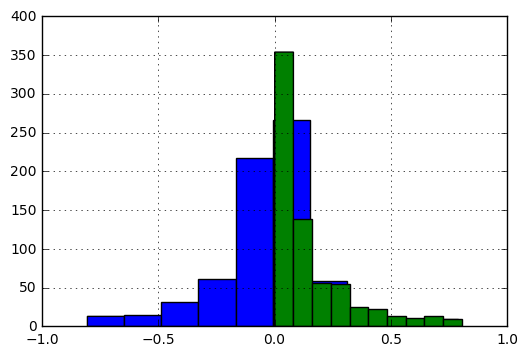

In [648]:
hist = plt.show(abs(peso).hist())

In [650]:
plt.figure(figsize=(80,40))

# setup Lambert Conformal basemap.
m = Basemap(width=1500000,height=2000000,projection='lcc',
            resolution='h',lat_1=15.,lat_2=25,lat_0=3.9,lon_0=-73.)
# draw coastlines.
m.drawcoastlines(linewidth=4)
m.drawcountries(linewidth=4)
m.drawmapboundary(fill_color='aquamarine')
m.fillcontinents(color="ivory",lake_color="aquamarine")
#m.drawstates()
#m.shadedrelief()
#m.etopo()

# draws locations
for latitude,longitude,radius,city,department in DATA:
    ##m.scatter(longitude,latitude,s=radius*50,marker='o',color='k',latlon=True)
    m.tissot(longitude,latitude,radius_deg=radius/200,npts=20)
    x,y=m(longitude,latitude)
    plt.text(x,y,city,fontsize=7)

In [504]:
# draws boundary lines of Voronoi's partition
def weights(c1,c2,valid="TRESH"):
    if (valid=="FREQ"):
        absolute_difference=abs(VALID_WORDS_ABS_FREC.iloc[:,c1]-VALID_WORDS_ABS_FREC.iloc[:,c2])
    else:
        absolute_difference=abs(VALID_WORDS_TRESH.iloc[:,c1]-VALID_WORDS_TRESH.iloc[:,c2])
    return absolute_difference



In [505]:
min_weight=99999999999999999999999999
max_weight=0.0000000000000000000000000000000001

In [79]:
weights_val=[]
for i in range(len(vor.ridge_vertices)):
    vertex1,vertex2=vor.ridge_vertices[i]  # points in the map defining the line
    city1,city2=vor.ridge_points[i]  # indexes of the cities separated by the line   
    #gets the line's weight
    line_weight=weights(city1,city2).sum()
    weights_val.append(line_weight)
    if line_weight>max_weight:
        max_weight=line_weight
    if line_weight<min_weight:
        min_weight=line_weight
   
print(min_weight,max_weight)
#plt.show(pandas.DataFrame(weights_val).hist())

5 623


In [1]:
def maping(grosor="peso"):
    maxi,mini,weigth = weigth_values()
    weigth.reset_index(level=0, inplace=True)
    weigth.set_index('orden', inplace=True)
    weigth.sort_index(inplace=True)       
    for i in range(len(vor.ridge_vertices)):
        vertex1,vertex2=vor.ridge_vertices[i]  # points in the map defining the line
        city1,city2=vor.ridge_points[i]  # indexes of the cities separated by the line
        if grosor=='peso_normalizado': 
            line_weight=(weigth.iloc[i,2]-mini)/(maxi-mini)
        if grosor=='peso':
            line_weight=abs(weigth.iloc[i,2])
        if grosor=='dist':
            line_weight=weigth.iloc[i,3]
        if vertex1==-1 or vertex2==-1:
            continue
        latitude1,longitude1=vor.vertices[vertex1]
        latitude2,longitude2=vor.vertices[vertex2]
        x,y=m([longitude1,longitude2],[latitude1,latitude2])    
        m.plot(x,y,color=weigth.iloc[i,1],linewidth=20*(line_weight))
    #plt.show()
    plt.savefig('../static/ctc/prv_1.png', format='png', dpi=200)    
maping()

NameError: name 'weigth_values' is not defined